<a href="https://colab.research.google.com/github/fabiozacavn/fabiozacavn.github.io/blob/main/Fabio_Zac%C3%A0_Aulab_Data_Analysis_Climate_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

1) Importazione delle Librerie

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

plt.style.use('ggplot')  # Stile alternativo compatibile
%matplotlib inline


In [ ]:
import pandas as pd

# 1️⃣ Lista ufficiale dei Paesi UE
EU_COUNTRIES = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
    'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
    'Spain', 'Sweden'
]

# 2️⃣ Funzione per caricare i dataset
def load_datasets(file_dict):
    """
    Carica più dataset CSV in un dizionario di DataFrame.
    Restituisce un dizionario con i DataFrame.
    """
    dataframes = {}
    for name, file in file_dict.items():
        try:
            df = pd.read_csv(file)
            dataframes[name] = df
            print(f"✅ Dataset '{name}' caricato correttamente.")
        except Exception as e:
            print(f"❌ Errore nel caricamento di '{name}': {e}")
    return dataframes

# 3️⃣ Funzione per filtrare i soli paesi UE
def filter_eu_countries(df):
    """
    Restituisce solo i dati relativi ai paesi UE, con indice resettato.
    """
    if 'Country' not in df.columns:
        print("⚠️ Colonna 'Country' mancante!")
        return df
    return df[df['Country'].isin(EU_COUNTRIES)].reset_index(drop=True)


In [ ]:
# Dizionario dei file che hai caricato
file_dict = {
    "CH4": "CH4_Emissions.csv",
    "CO2": "CO2_Emissions.csv",
    "GHG": "GHG_Emissions.csv",
    "N2O": "N2O_Emissions.csv",
    "NOx": "NOx_Emissions.csv",
    "SO2": "SO2_emissions.csv"
}

# Carica tutti i DataFrame
dataframes = load_datasets(file_dict)

# Applica il filtro UE a ciascuno
dataframes_ue = {name: filter_eu_countries(df) for name, df in dataframes.items()}


✅ Dataset 'CH4' caricato correttamente.
✅ Dataset 'CO2' caricato correttamente.
✅ Dataset 'GHG' caricato correttamente.
✅ Dataset 'N2O' caricato correttamente.
✅ Dataset 'NOx' caricato correttamente.
✅ Dataset 'SO2' caricato correttamente.


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 1️⃣ Converte le colonne in numeriche
def convert_values_to_numeric(df):
    """
    Converte le colonne in numeriche (eccetto 'Country') e restituisce:
    - DataFrame convertito
    - Lista delle colonne numeriche
    """
    df_copy = df.copy()
    numeric_cols = []

    for col in df_copy.columns:
        if col != 'Country':
            df_copy[col] = pd.to_numeric(df_copy[col], errors='coerce')
            numeric_cols.append(col)

    return df_copy, numeric_cols

# 2️⃣ Calcola le emissioni totali e medie
def calculate_emissions(df):
    """
    Calcola le emissioni totali e medie per ogni Paese.
    Restituisce un nuovo DataFrame con colonne 'Totale' e 'Media'.
    """
    df_numeric, numeric_cols = convert_values_to_numeric(df)
    df_numeric["Totale"] = df_numeric[numeric_cols].sum(axis=1)
    df_numeric["Media"] = df_numeric[numeric_cols].mean(axis=1)
    df_sorted = df_numeric.sort_values(by="Totale", ascending=False)
    return df_sorted

# 3️⃣ Crea il grafico a barre
def plot_emissions(df, gas_name):
    """
    Crea un grafico a barre delle emissioni totali per ciascun Paese.
    """
    plt.figure(figsize=(14, 6))
    plt.bar(df["Country"], df["Totale"], color="steelblue")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Emissioni Totali")
    plt.title(f"🇪🇺 Emissioni Totali di {gas_name} nei Paesi UE (1990–2023)")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    # Output tabellare
    print("🔝 Top 10 Paesi per emissioni totali:")
    print(df[["Country", "Totale", "Media"]].head(10))


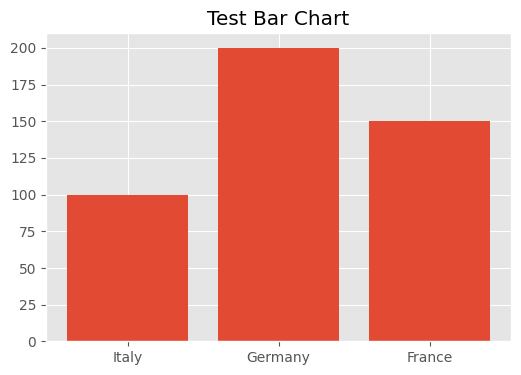

In [ ]:
import matplotlib.pyplot as plt
%matplotlib inline

plt.figure(figsize=(6, 4))
plt.bar(['Italy', 'Germany', 'France'], [100, 200, 150])
plt.title("Test Bar Chart")
plt.show()


In [ ]:
# 📌 Importa librerie
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 📌 Funzione per convertire tutte le colonne tranne 'Country' in numeriche
def convert_values_to_numeric(df):
    df = df.copy()
    df.columns = df.columns.str.strip()  # Rimuove spazi bianchi dai nomi delle colonne
    numeric_cols = []

    for col in df.columns:
        if col != 'Country':
            df[col] = pd.to_numeric(df[col], errors='coerce')
            numeric_cols.append(col)

    return df, numeric_cols

# 📌 Funzione per calcolare emissioni totali e medie per paese
def calculate_emissions(df):
    df_numeric, numeric_cols = convert_values_to_numeric(df)
    df_numeric["Totale"] = df_numeric[numeric_cols].sum(axis=1)
    df_numeric["Media"] = df_numeric[numeric_cols].mean(axis=1)
    df_sorted = df_numeric.sort_values(by="Totale", ascending=False)
    return df_sorted

# 📌 Funzione per creare il grafico a barre
def plot_emissions(df, gas_name):
    plt.figure(figsize=(14, 6))
    plt.bar(df["Country"], df["Totale"], color="darkcyan")
    plt.xticks(rotation=45, ha="right")
    plt.ylabel("Emissioni Totali")
    plt.title(f"🇪🇺 Emissioni Totali di {gas_name} nei Paesi UE (1990–2023)")
    plt.grid(axis="y", linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    print("🔝 Top 10 Paesi per emissioni totali:")
    print(df[["Country", "Totale", "Media"]].head(10))


🔝 Top 10 Paesi per emissioni CO₂ (1990–2023):
        Country       Totale          Media
10      Germany  27898775.96  820552.234118
14        Italy  13837636.90  406989.320588
9        France  12709599.87  373811.760882
20       Poland  10925350.06  321333.825294
25        Spain   9384270.88  276007.967059
19  Netherlands   5654784.53  166317.192059
5       Czechia   3943157.17  115975.210882
1       Belgium   3754316.63  110421.077353
22      Romania   3266335.11   96068.679706
11       Greece   2990037.65   87942.283824


/tmp/ipython-input-13-3812537755.py:34: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-13-3812537755.py:34: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


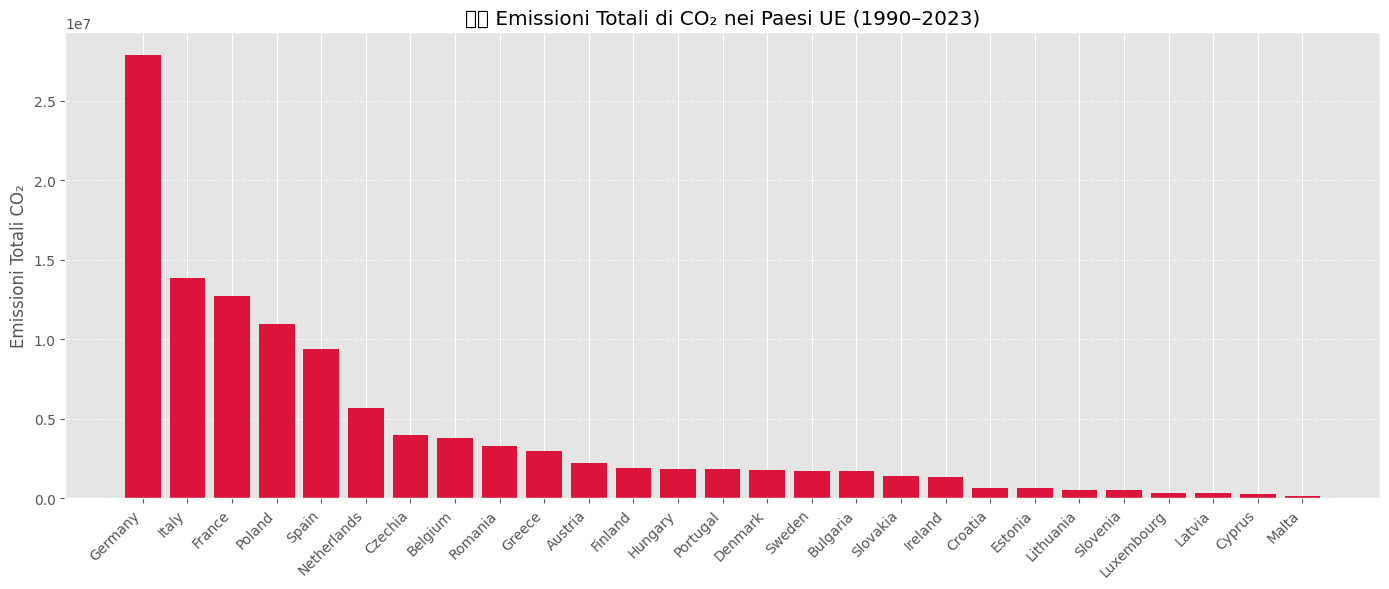

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 🔹 Step 1: Carica il DataFrame (già filtrato per i paesi UE)
df_co2 = dataframes_ue["CO2"].copy()

# 🔹 Step 2: Pulisci i nomi delle colonne
df_co2.columns = df_co2.columns.str.strip()

# 🔹 Step 3: Converte le colonne da anno in numerico
year_cols = [col for col in df_co2.columns if col != "Country"]
for col in year_cols:
    df_co2[col] = pd.to_numeric(df_co2[col], errors="coerce")

# 🔹 Step 4: Calcola emissioni totali e medie
df_co2["Totale"] = df_co2[year_cols].sum(axis=1)
df_co2["Media"] = df_co2[year_cols].mean(axis=1)

# 🔹 Step 5: Ordina per emissioni totali
df_sorted = df_co2.sort_values(by="Totale", ascending=False)

# 🔹 Step 6: Mostra tabella Top 10
print("🔝 Top 10 Paesi per emissioni CO₂ (1990–2023):")
print(df_sorted[["Country", "Totale", "Media"]].head(10))

# 🔹 Step 7: Grafico a barre
plt.figure(figsize=(14, 6))
plt.bar(df_sorted["Country"], df_sorted["Totale"], color="crimson")
plt.xticks(rotation=45, ha="right")
plt.ylabel("Emissioni Totali CO₂")
plt.title("🇪🇺 Emissioni Totali di CO₂ nei Paesi UE (1990–2023)")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd

# 🔹 Caricamento del dataset
df_renew = pd.read_csv("Renewable_Electricity_Production_Dataset.csv")

# 🔹 Esplorazione base
print("📊 Info sul dataset:")
print(df_renew.info())
print("\n🧩 Prime righe:")
print(df_renew.head(3))

# 🔹 Rinominare la colonna per uniformità
df_renew.rename(columns={"Country and area": "Country"}, inplace=True)

# 🔹 Lista paesi UE
EU_COUNTRIES = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
    'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
    'Spain', 'Sweden'
]

# 🔹 Funzione per filtrare solo i Paesi UE
def filter_eu_countries(df):
    return df[df["Country"].isin(EU_COUNTRIES)].reset_index(drop=True)

# 🔹 Funzione per selezionare solo colonne dal 2005 in poi
def get_columns_from_2005(df):
    # Trova l'indice della colonna "2005"
    col_start = df.columns.get_loc("2005")
    return ["Country"] + list(df.columns[col_start:])

# 🔹 Applichiamo il filtro
df_renew_eu = filter_eu_countries(df_renew)
df_renew_eu_2005 = df_renew_eu[get_columns_from_2005(df_renew_eu)]

# 🔹 Visualizzazione finale
print("\n✅ Dataset filtrato pronto:")
print(df_renew_eu_2005.head())


📊 Info sul dataset:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 224 entries, 0 to 223
Data columns (total 35 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Country and area  224 non-null    object 
 1   1990              181 non-null    object 
 2   1991              185 non-null    float64
 3   1992              210 non-null    float64
 4   1993              210 non-null    float64
 5   1994              212 non-null    float64
 6   1995              212 non-null    float64
 7   1996              212 non-null    float64
 8   1997              212 non-null    float64
 9   1998              212 non-null    float64
 10  1999              213 non-null    float64
 11  2000              214 non-null    float64
 12  2001              215 non-null    float64
 13  2002              217 non-null    float64
 14  2003              217 non-null    float64
 15  2004              217 non-null    float64
 16  2005              220 no

🔝 Paesi UE con maggior % di elettricità da rinnovabili nel 2023:
       Country   2023
17  Luxembourg  78.47
0      Austria  70.48
16   Lithuania  68.26
15      Latvia  59.84
3      Croatia  57.59
26      Sweden  50.47
6      Denmark  49.88
22     Romania  37.52
21    Portugal  35.88
25       Spain  31.31


/tmp/ipython-input-2-247281509.py:22: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-2-247281509.py:22: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


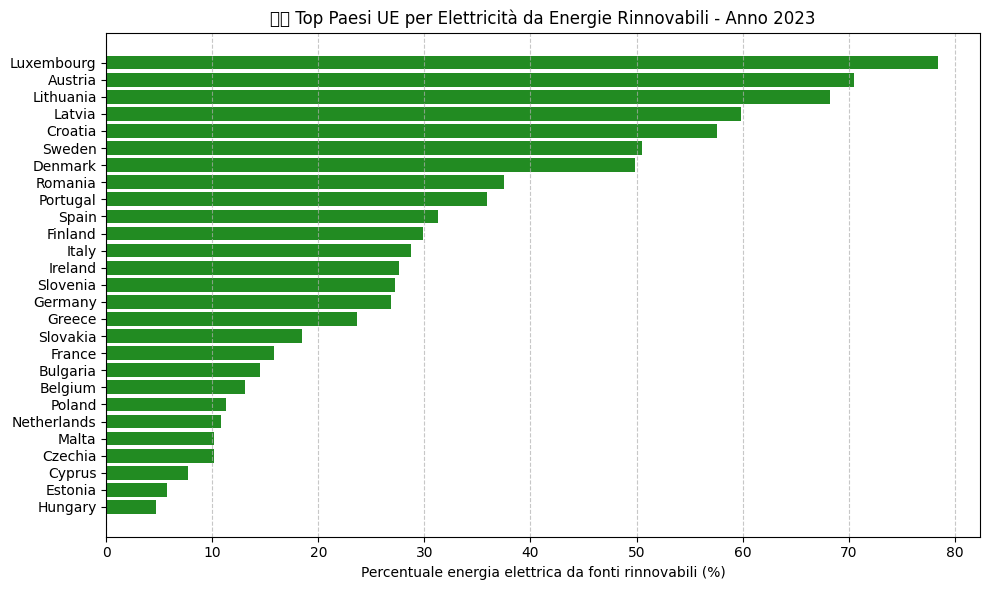

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

# 🔹 Step 1: copia del dataframe pulito
df_rinnovabili = df_renew_eu_2005.copy()

# 🔹 Step 2: ordina per valore 2023 decrescente
df_top_2023 = df_rinnovabili[["Country", "2023"]].sort_values(by="2023", ascending=False)

# 🔹 Step 3: visualizza la tabella
print("🔝 Paesi UE con maggior % di elettricità da rinnovabili nel 2023:")
print(df_top_2023.head(10))

# 🔹 Step 4: crea grafico a barre orizzontali
plt.figure(figsize=(10, 6))
plt.barh(df_top_2023["Country"], df_top_2023["2023"], color="forestgreen")
plt.xlabel("Percentuale energia elettrica da fonti rinnovabili (%)")
plt.title("🇪🇺 Top Paesi UE per Elettricità da Energie Rinnovabili - Anno 2023")
plt.gca().invert_yaxis()  # il più virtuoso in alto
plt.grid(axis="x", linestyle="--", alpha=0.7)
plt.tight_layout()
plt.show()


/tmp/ipython-input-3-71427616.py:21: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-3-71427616.py:21: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()


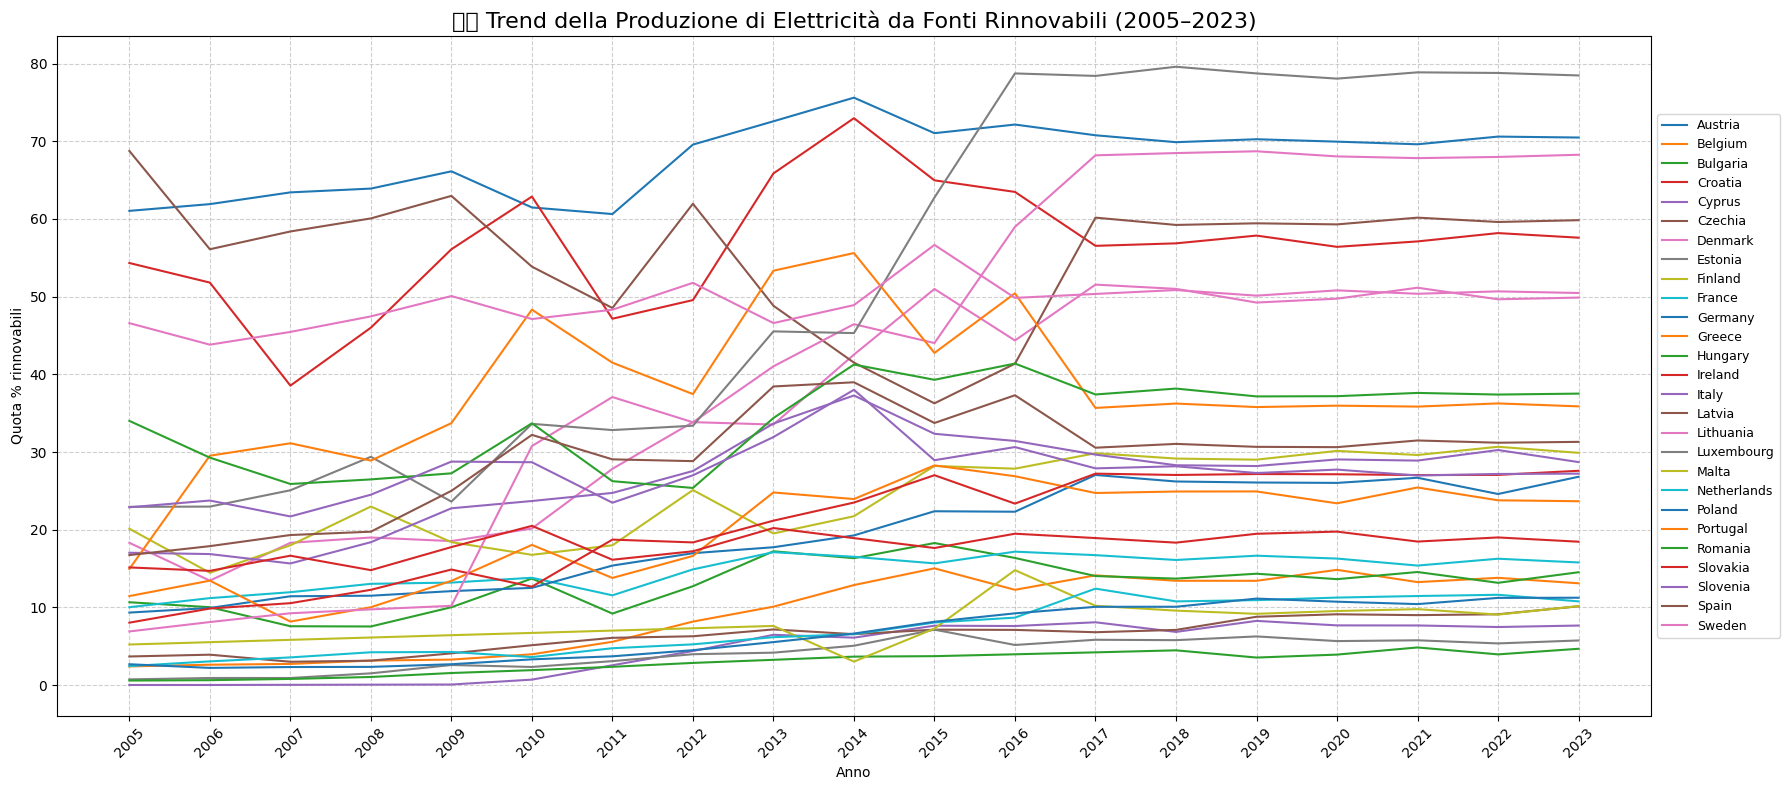

In [ ]:
import matplotlib.pyplot as plt

# 🔹 Estrai solo colonne degli anni
anni = [col for col in df_renew_eu_2005.columns if col != "Country"]

# 🔹 Setup figura
plt.figure(figsize=(18, 8))

# 🔹 Itera per ogni Paese e crea una linea
for paese in df_renew_eu_2005["Country"]:
    dati_paese = df_renew_eu_2005[df_renew_eu_2005["Country"] == paese]
    plt.plot(anni, dati_paese.iloc[0, 1:], label=paese)

# 🔹 Personalizzazione grafico
plt.title("🇪🇺 Trend della Produzione di Elettricità da Fonti Rinnovabili (2005–2023)", fontsize=16)
plt.xlabel("Anno")
plt.ylabel("Quota % rinnovabili")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend(loc='center left', bbox_to_anchor=(1, 0.5), ncol=1, fontsize=9)
plt.tight_layout()
plt.show()


/tmp/ipython-input-4-1439302990.py:22: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


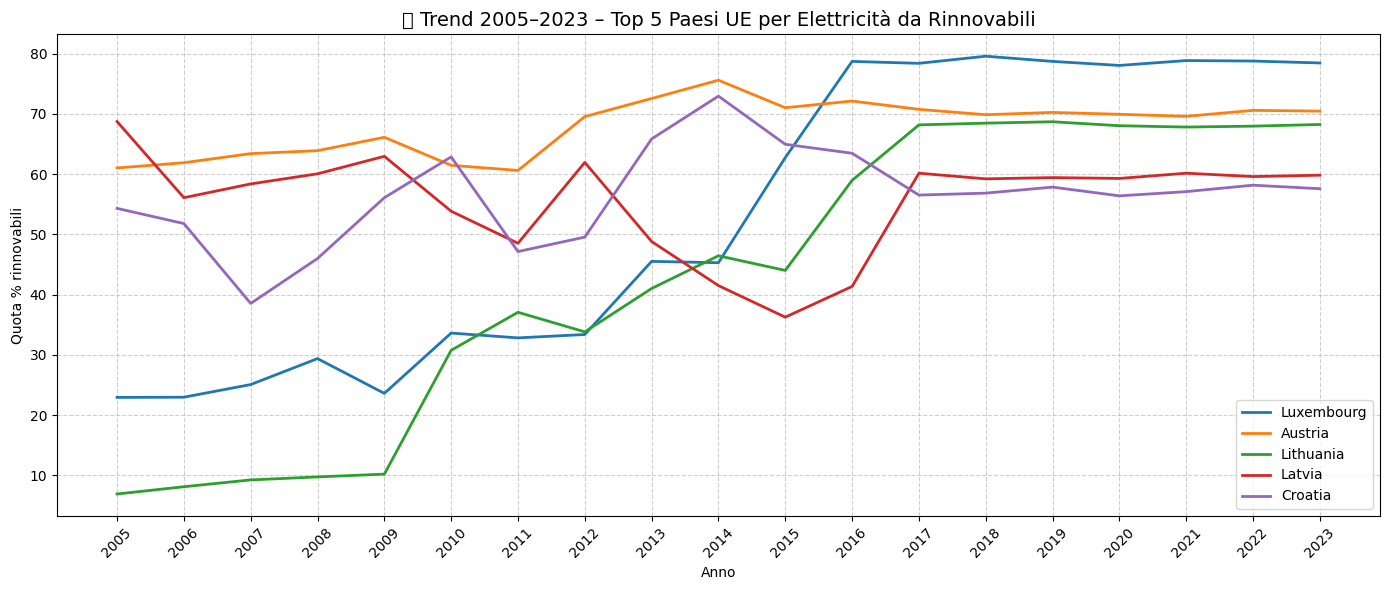

In [ ]:
# 🔹 Seleziona i top 5 paesi per valore 2023
top5_2023 = df_renew_eu_2005.sort_values(by="2023", ascending=False).head(5)["Country"].tolist()

# 🔹 Estrai solo colonne degli anni
anni = [col for col in df_renew_eu_2005.columns if col != "Country"]

# 🔹 Setup figura
plt.figure(figsize=(14, 6))

# 🔹 Itera sui top 5 e disegna le linee
for paese in top5_2023:
    dati_paese = df_renew_eu_2005[df_renew_eu_2005["Country"] == paese]
    plt.plot(anni, dati_paese.iloc[0, 1:], label=paese, linewidth=2)

# 🔹 Personalizza il grafico
plt.title("📈 Trend 2005–2023 – Top 5 Paesi UE per Elettricità da Rinnovabili", fontsize=14)
plt.xlabel("Anno")
plt.ylabel("Quota % rinnovabili")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


/tmp/ipython-input-5-197992244.py:18: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-197992244.py:18: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-197992244.py:18: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-197992244.py:18: UserWarning: Glyph 127466 (\N{REGIONAL INDICATOR SYMBOL LETTER E}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-5-197992244.py:18: UserWarning: Glyph 127482 (\N{REGIONAL INDICATOR SYMBOL LETTER U}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128202 (\N{BAR CHART}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-pack

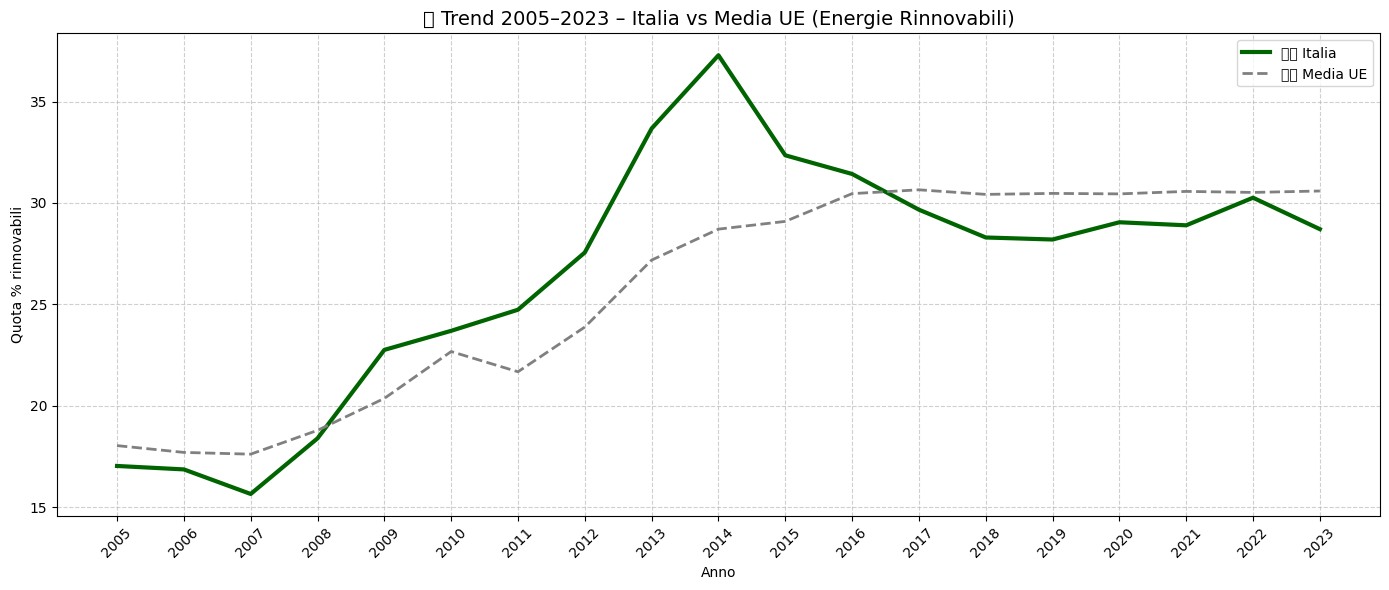

In [ ]:
# 🔹 Estrai dati Italia
italia = df_renew_eu_2005[df_renew_eu_2005["Country"] == "Italy"].iloc[0, 1:]

# 🔹 Calcola media UE per ogni anno
media_ue = df_renew_eu_2005[anni].mean()

# 🔹 Grafico comparativo
plt.figure(figsize=(14, 6))
plt.plot(anni, italia, label="🇮🇹 Italia", color='darkgreen', linewidth=3)
plt.plot(anni, media_ue, label="🇪🇺 Media UE", color='gray', linestyle='--', linewidth=2)

plt.title("📊 Trend 2005–2023 – Italia vs Media UE (Energie Rinnovabili)", fontsize=14)
plt.xlabel("Anno")
plt.ylabel("Quota % rinnovabili")
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()


In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

def correlazione_gas_rinnovabili(df_gas, gas_name, df_renewable=df_renew_eu_2005):
    """
    Calcola la correlazione tra media % rinnovabili e emissioni totali per uno specifico gas.
    Mostra lo scatter plot e stampa il valore della correlazione.
    """
    # 1. Pulisce nomi colonne
    df_gas = df_gas.copy()
    df_gas.columns = df_gas.columns.str.strip()
    for col in df_gas.columns:
        if col != "Country":
            df_gas[col] = pd.to_numeric(df_gas[col], errors="coerce")

    # 2. Calcola emissioni totali
    df_gas["Total_Emissions"] = df_gas.iloc[:, 1:].sum(axis=1)
    df_emissioni = df_gas[["Country", "Total_Emissions"]]

    # 3. Calcola media % rinnovabili per paese
    anni = [col for col in df_renewable.columns if col != "Country"]
    df_media_ren = pd.DataFrame({
        "Country": df_renewable["Country"],
        "Renewable_Energy_Mean": df_renewable[anni].mean(axis=1)
    })

    # 4. Merge dei due dataframe
    df_finale = pd.merge(df_emissioni, df_media_ren, on="Country")

    # 5. Calcolo della correlazione
    correlazione = df_finale["Total_Emissions"].corr(df_finale["Renewable_Energy_Mean"])

    # 6. Scatter plot
    plt.figure(figsize=(8, 6))
    plt.scatter(df_finale["Renewable_Energy_Mean"], df_finale["Total_Emissions"], color="darkred")
    plt.title(f"🔄 Correlazione tra Rinnovabili e {gas_name}", fontsize=14)
    plt.xlabel("Media % Rinnovabili (2005–2023)")
    plt.ylabel(f"Totale Emissioni di {gas_name}")
    plt.grid(True, linestyle="--", alpha=0.5)
    plt.tight_layout()
    plt.show()

    # 7. Stampa risultato
    print(f"📌 Correlazione tra media % rinnovabili e {gas_name}: {round(correlazione, 3)}")

    return correlazione


In [ ]:
def correlazione_gas_rinnovabili(df_gas, gas_name, df_renewable=df_renew_eu_2005):
    df_gas = df_gas.copy()
    df_gas.columns = df_gas.columns.str.strip()
    for col in df_gas.columns:
        if col != "Country":
            df_gas[col] = pd.to_numeric(df_gas[col], errors="coerce")

    df_gas["Total_Emissions"] = df_gas.iloc[:, 1:].sum(axis=1)
    df_emissioni = df_gas[["Country", "Total_Emissions"]]

    anni = [col for col in df_renewable.columns if col != "Country"]
    df_media_ren = pd.DataFrame({
        "Country": df_renewable["Country"],
        "Renewable_Energy_Mean": df_renewable[anni].mean(axis=1)
    })

    df_finale = pd.merge(df_emissioni, df_media_ren, on="Country")

    correlazione = df_finale["Total_Emissions"].corr(df_finale["Renewable_Energy_Mean"])

    # Ritorna df_finale per usarlo fuori
    return df_finale, correlazione, gas_name


In [ ]:
df_corr, corr_val, gas = correlazione_gas_rinnovabili(dataframes_ue["CH4"], "CH₄")

plt.figure(figsize=(8, 6))
plt.scatter(df_corr["Renewable_Energy_Mean"], df_corr["Total_Emissions"], color="darkblue")
plt.title(f"🔄 Correlazione tra Rinnovabili e {gas}", fontsize=14)
plt.xlabel("Media % Rinnovabili (2005–2023)")
plt.ylabel(f"Totale Emissioni di {gas}")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

print(f"📌 Correlazione tra media % rinnovabili e {gas}: {round(corr_val, 3)}")


NameError: name 'dataframes_ue' is not defined

In [ ]:
import pandas as pd

EU_COUNTRIES = [
    'Austria', 'Belgium', 'Bulgaria', 'Croatia', 'Cyprus', 'Czechia',
    'Denmark', 'Estonia', 'Finland', 'France', 'Germany', 'Greece', 'Hungary',
    'Ireland', 'Italy', 'Latvia', 'Lithuania', 'Luxembourg', 'Malta',
    'Netherlands', 'Poland', 'Portugal', 'Romania', 'Slovakia', 'Slovenia',
    'Spain', 'Sweden'
]

def filter_eu_countries(df):
    return df[df["Country"].isin(EU_COUNTRIES)].reset_index(drop=True)

# Rinomina i file CSV se necessario
file_dict = {
    "CH4": "CH4_Emissions.csv",
    "CO2": "CO2_Emissions.csv",
    "GHG": "GHG_Emissions.csv",
    "N2O": "N2O_Emissions.csv",
    "NOx": "NOx_Emissions.csv",
    "SO2": "SO2_emissions.csv"
}

dataframes_ue = {}

for gas, filename in file_dict.items():
    df = pd.read_csv(filename)
    df = filter_eu_countries(df)
    dataframes_ue[gas] = df


In [ ]:
df_renew = pd.read_csv("Renewable_Electricity_Production_Dataset.csv")
df_renew.rename(columns={"Country and area": "Country"}, inplace=True)
df_renew_eu = filter_eu_countries(df_renew)

# Filtra solo colonne dal 2005 in poi
col_start = df_renew_eu.columns.get_loc("2005")
df_renew_eu_2005 = df_renew_eu[["Country"] + list(df_renew_eu.columns[col_start:])]


/tmp/ipython-input-11-876358669.py:9: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128260 (\N{ANTICLOCKWISE DOWNWARDS AND UPWARDS OPEN CIRCLE ARROWS}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


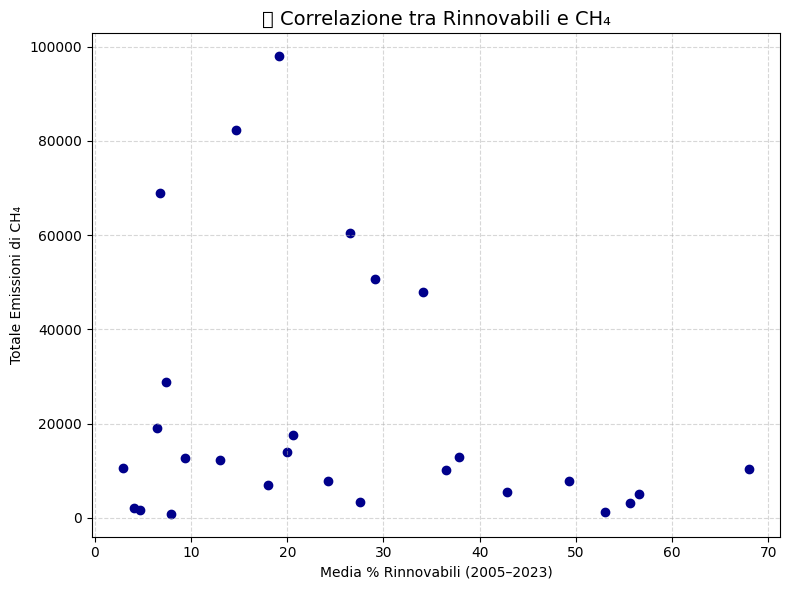

📌 Correlazione tra media % rinnovabili e CH₄: -0.215


In [ ]:
df_corr, corr_val, gas = correlazione_gas_rinnovabili(dataframes_ue["CH4"], "CH₄")

plt.figure(figsize=(8, 6))
plt.scatter(df_corr["Renewable_Energy_Mean"], df_corr["Total_Emissions"], color="darkblue")
plt.title(f"🔄 Correlazione tra Rinnovabili e {gas}", fontsize=14)
plt.xlabel("Media % Rinnovabili (2005–2023)")
plt.ylabel(f"Totale Emissioni di {gas}")
plt.grid(True, linestyle="--", alpha=0.5)
plt.tight_layout()
plt.show()

print(f"📌 Correlazione tra media % rinnovabili e {gas}: {round(corr_val, 3)}")


In [ ]:
correlazione_gas_rinnovabili(dataframes_ue["NOx"], "NOₓ")
correlazione_gas_rinnovabili(dataframes_ue["SO2"], "SO₂")
correlazione_gas_rinnovabili(dataframes_ue["N2O"], "N₂O")
correlazione_gas_rinnovabili(dataframes_ue["GHG"], "Gas Serra Totali")
correlazione_gas_rinnovabili(dataframes_ue["CO2"], "CO₂")  # se vuoi anche questo


(        Country  Total_Emissions  Renewable_Energy_Mean
 0       Austria       2208730.91              67.947895
 1       Belgium       3754316.63               9.381053
 2      Bulgaria       1690011.73              13.038947
 3       Croatia        639577.91              56.538421
 4        Cyprus        241482.24               4.708421
 5       Czechia       3943157.17               6.498947
 6       Denmark       1750731.16              36.480526
 7       Estonia        606761.25               4.111579
 8       Finland       1869233.90              24.187895
 9        France      12709599.87              14.706842
 10      Germany      27898775.96              19.179474
 11       Greece       2990037.65              19.990526
 12      Hungary       1854068.68               2.952105
 13      Ireland       1348127.44              20.562632
 14        Italy      13837636.90              26.555263
 15       Latvia        300655.58              55.598947
 16    Lithuania        508329.

In [ ]:
def tabella_correlazioni(dataframes_ue, df_renewable):
    risultati = []

    for gas, df_gas in dataframes_ue.items():
        # Calcola emissioni totali
        df = df_gas.copy()
        df.columns = df.columns.str.strip()
        for col in df.columns:
            if col != "Country":
                df[col] = pd.to_numeric(df[col], errors="coerce")
        df["Total_Emissions"] = df.iloc[:, 1:].sum(axis=1)
        df_emissioni = df[["Country", "Total_Emissions"]]

        # Calcola media rinnovabili
        anni = [col for col in df_renewable.columns if col != "Country"]
        df_media = pd.DataFrame({
            "Country": df_renewable["Country"],
            "Renewable_Energy_Mean": df_renewable[anni].mean(axis=1)
        })

        # Merge e calcolo correlazione
        df_merge = pd.merge(df_emissioni, df_media, on="Country")
        corr = df_merge["Total_Emissions"].corr(df_merge["Renewable_Energy_Mean"])

        risultati.append({
            "Gas Serra": gas,
            "Correlazione": round(corr, 3)
        })

    # Crea DataFrame ordinato
    df_corr_table = pd.DataFrame(risultati).sort_values(by="Correlazione")
    return df_corr_table


In [ ]:
df_tabella = tabella_correlazioni(dataframes_ue, df_renew_eu_2005)
print(df_tabella)


  Gas Serra  Correlazione
5       SO2        -0.297
0       CH4        -0.215
3       N2O        -0.211
1       CO2        -0.204
2       GHG        -0.180
4       NOx        -0.173


/tmp/ipython-input-15-3358691323.py:15: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


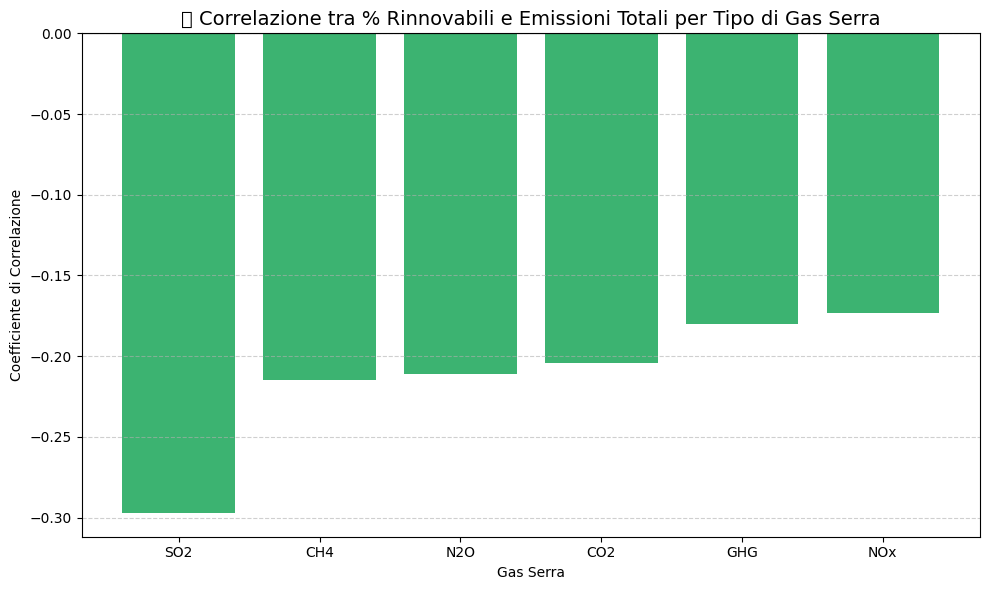

In [ ]:
import matplotlib.pyplot as plt

# 📊 Grafico a barre delle correlazioni
plt.figure(figsize=(10, 6))
plt.bar(df_tabella["Gas Serra"], df_tabella["Correlazione"], color="mediumseagreen")

# Aggiungi linea orizzontale a zero
plt.axhline(0, color='black', linewidth=0.8)

# Etichette e titolo
plt.title("📉 Correlazione tra % Rinnovabili e Emissioni Totali per Tipo di Gas Serra", fontsize=14)
plt.xlabel("Gas Serra")
plt.ylabel("Coefficiente di Correlazione")
plt.grid(axis="y", linestyle="--", alpha=0.6)
plt.tight_layout()
plt.show()


In [16]:
def scatter_correlazione(df_gas, gas_nome, df_renewable=df_renew_eu_2005):
    df = df_gas.copy()
    df.columns = df.columns.str.strip()
    for col in df.columns:
        if col != "Country":
            df[col] = pd.to_numeric(df[col], errors="coerce")

    # Totale emissioni gas
    df["Totale"] = df.iloc[:, 1:].sum(axis=1)
    df_emissioni = df[["Country", "Totale"]]

    # Media rinnovabili
    anni = [col for col in df_renewable.columns if col != "Country"]
    df_ren = pd.DataFrame({
        "Country": df_renewable["Country"],
        "Rinnovabili_Media": df_renewable[anni].mean(axis=1)
    })

    # Merge
    df_corr = pd.merge(df_emissioni, df_ren, on="Country")
    corr = df_corr["Totale"].corr(df_corr["Rinnovabili_Media"])

    # Grafico
    plt.figure(figsize=(8, 6))
    plt.scatter(df_corr["Rinnovabili_Media"], df_corr["Totale"], color="tomato")
    plt.title(f"📉 Correlazione: Rinnovabili vs {gas_nome} | r = {round(corr, 3)}", fontsize=13)
    plt.xlabel("Media % Rinnovabili (2005–2023)")
    plt.ylabel(f"Totale Emissioni di {gas_nome}")
    plt.grid(True, linestyle="--", alpha=0.6)
    plt.tight_layout()
    plt.show()

    print(f"✅ Correlazione Rinnovabili vs {gas_nome}: {round(corr, 3)}")


/tmp/ipython-input-16-3182612100.py:30: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


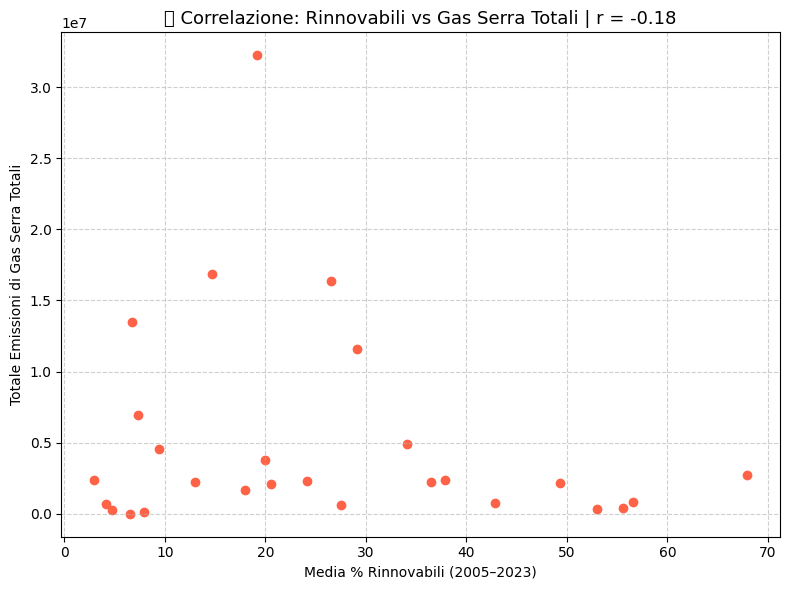

✅ Correlazione Rinnovabili vs Gas Serra Totali: -0.18


In [17]:
scatter_correlazione(dataframes_ue["GHG"], "Gas Serra Totali")


/tmp/ipython-input-16-3182612100.py:30: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128201 (\N{CHART WITH DOWNWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


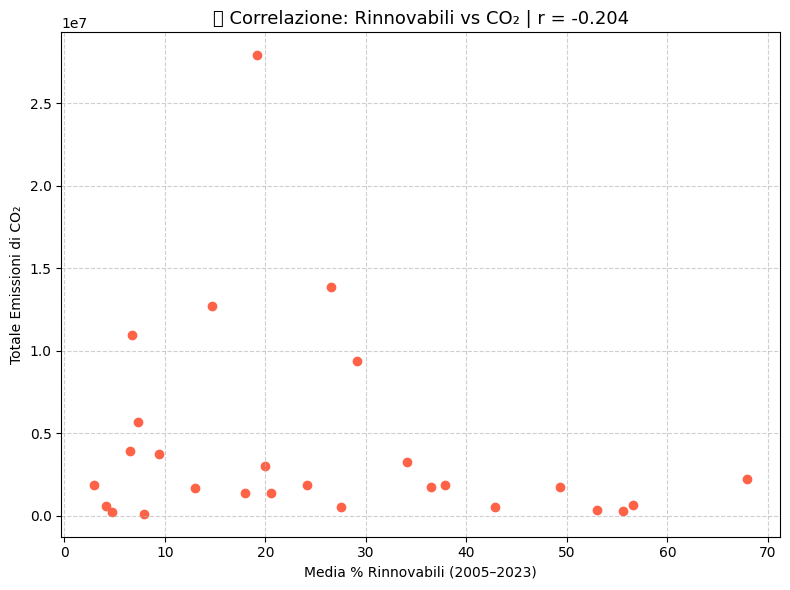

✅ Correlazione Rinnovabili vs CO₂: -0.204


In [18]:
scatter_correlazione(dataframes_ue["CO2"], "CO₂")


/tmp/ipython-input-19-2074026233.py:38: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  metrics_df = pd.concat([


📈 Predizioni CO₂ per l’Italia (2024–2035):
    Year          Italy
0   2024  300088.053797
1   2025  293979.409980
2   2026  287870.766163
3   2027  281762.122347
4   2028  275653.478530
5   2029  269544.834714
6   2030  263436.190897
7   2031  257327.547080
8   2032  251218.903264
9   2033  245110.259447
10  2034  239001.615630
11  2035  232892.971814


/tmp/ipython-input-19-2074026233.py:60: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipython-input-19-2074026233.py:60: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127470 (\N{REGIONAL INDICATOR SYMBOL LETTER I}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 127481 (\N{REGIONAL INDICATOR SYMBOL LETTER T}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


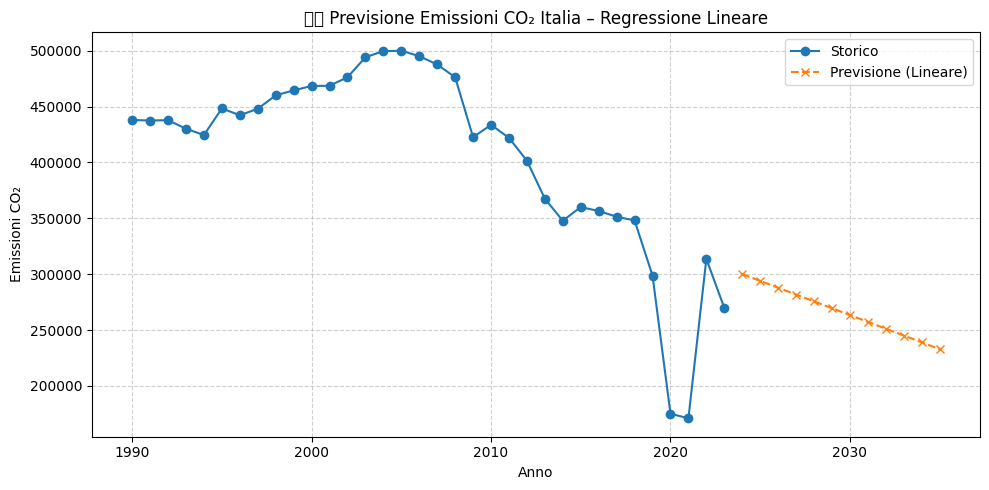


🔍 Classifica R² più alti:


,Country,RMSE,R2
22,Romania,11014.103773,0.839795
5,Czechia,10934.613219,0.788213
12,Hungary,4862.535704,0.768604
26,Sweden,4395.671076,0.732218
6,Denmark,6059.601943,0.731392



⚠️ Classifica RMSE più alti (errori maggiori):


,Country,RMSE,R2
10,Germany,90112.124010,0.704625
14,Italy,58113.377776,0.515387
25,Spain,51135.670331,0.066151
9,France,42881.650945,0.571467
20,Poland,33913.245845,0.498271


In [19]:
# 📦 Librerie necessarie
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.pyplot as plt
%matplotlib inline

# 📌 Step 1 – Dati di partenza (già filtrati sui paesi UE)
df_co2 = dataframes_ue["CO2"].copy()
df_co2.columns = df_co2.columns.str.strip()

# 📌 Step 2 – Prepara variabili X (anni) e future_years (dal 2024 al 2035)
anni_storici = [int(col) for col in df_co2.columns if col != "Country"]
X = np.array(anni_storici).reshape(-1, 1)
future_years = np.arange(2024, 2036).reshape(-1, 1)

# 📌 Step 3 – DataFrame vuoti per risultati
predictions = pd.DataFrame({"Year": np.arange(2024, 2036)})
metrics_df = pd.DataFrame(columns=["Country", "RMSE", "R2"])

# 📌 Step 4 – Ciclo su ogni Paese
for country in df_co2["Country"]:
    country_data = df_co2[df_co2["Country"] == country].iloc[0, 1:].values.astype(float)

    # Modello
    model = LinearRegression()
    model.fit(X, country_data)

    # Predizione in-sample (anni storici)
    y_pred = model.predict(X)

    # Calcolo metriche
    rmse = np.sqrt(mean_squared_error(country_data, y_pred))
    r2 = r2_score(country_data, y_pred)

    # Salva metriche
    metrics_df = pd.concat([
        metrics_df,
        pd.DataFrame({"Country": [country], "RMSE": [rmse], "R2": [r2]})
    ], ignore_index=True)

    # Predizione per anni futuri
    future_preds = model.predict(future_years)
    predictions[country] = future_preds

# 📌 Step 5 – Mostra risultati per l’Italia
print("📈 Predizioni CO₂ per l’Italia (2024–2035):")
print(predictions[["Year", "Italy"]])

# 📌 Step 6 – Visualizza il trend Italia
plt.figure(figsize=(10, 5))
plt.plot(X.flatten(), df_co2[df_co2["Country"] == "Italy"].iloc[0, 1:].values, label="Storico", marker='o')
plt.plot(future_years.flatten(), predictions["Italy"], label="Previsione (Lineare)", linestyle='--', marker='x')
plt.title("🇮🇹 Previsione Emissioni CO₂ Italia – Regressione Lineare")
plt.xlabel("Anno")
plt.ylabel("Emissioni CO₂")
plt.grid(True, linestyle="--", alpha=0.6)
plt.legend()
plt.tight_layout()
plt.show()

# 📌 Step 7 – Valutazione modelli
print("\n🔍 Classifica R² più alti:")
display(metrics_df.sort_values(by="R2", ascending=False).head())

print("\n⚠️ Classifica RMSE più alti (errori maggiori):")
display(metrics_df.sort_values(by="RMSE", ascending=False).head())
